# Data Loading And silent speech removal


In [ ]:
! pip install librosa

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import librosa
import pandas as pd
# write your own path while loading
# PATH = "/content/drive/MyDrive/16000_pcm_speeches"
PATH = "/content/drive/MyDrive/ml Project/16000_pcm_speeches"
SAMPLE_RATE = 22050


classes = os.listdir(PATH)
classes.remove('other')
classes.remove('_background_noise_')
classes.remove('tf_Wav_reader.py')
classes

#ignore this this was for debug
raw_data = dict()
raw_files = dict()
#load files
for i in classes:
    raw_data[i] = []
    raw_files[i] = []
    for j in os.listdir(PATH+'/'+i):
      raw_data[i].append(librosa.load(PATH+'/'+ i + '/'+j,sr=SAMPLE_RATE)[0])
      raw_files[i].append(j)
    #   break
    # break
    print(i,"done")
# print(rfdf,rddf)

In [ ]:
raw_data.keys()

dict_keys(['Jens_Stoltenberg', 'Benjamin_Netanyau', 'Magaret_Tarcher', 'Julia_Gillard', 'Nelson_Mandela'])

In [ ]:
import numpy as np
import pandas as pd
import librosa

def energy(audio_file) -> np.ndarray:
  return np.log(librosa.feature.rms(y=audio_file,frame_length=int(SAMPLE_RATE*0.25),hop_length=int(SAMPLE_RATE*0.15)))

#calculate thresholds seprately
def VAD(audio_list: np.ndarray, classification_threshold ,percentile_threshold=75):
  ret = []
  rmse_l = []
  for i in audio_list:
    rmse = np.percentile(energy(i),percentile_threshold)
    rmse_l.append(rmse)
    ret.append(True if rmse > classification_threshold else False)
  return (np.array(ret),np.array(rmse_l))



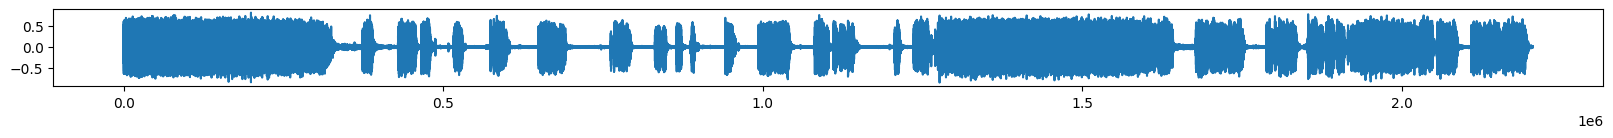

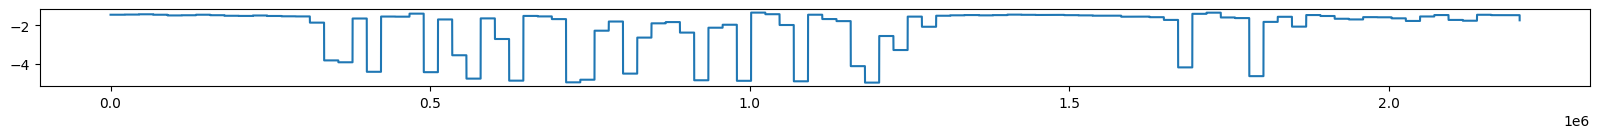

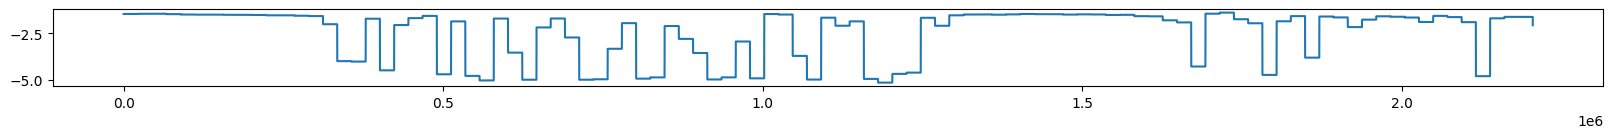

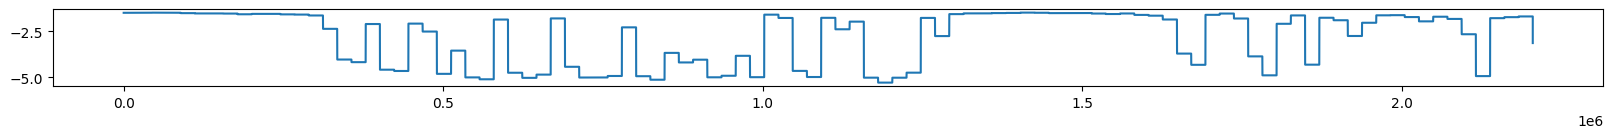

In [ ]:
import matplotlib.pyplot as plt
vvd = VAD(sample_data,0.2)[1]
vvc = np.concatenate(sample_data)

plt.figure(figsize = (20,1))
plt.plot(vvc)
plt.show()

vvd = VAD(sample_data,0.2,75)[1]
vvc = np.concatenate(sample_data)
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()

vvd = VAD(sample_data,0.2,50)[1]
vvc = np.concatenate(sample_data)
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()

vvd = VAD(sample_data,0.2,25)[1]
vvc = np.concatenate(sample_data)
plt.figure(figsize = (20,1))
plt.plot(vvd[np.linspace(0,len(vvd)-1,len(vvc),dtype = int)])
plt.show()


In [ ]:
print(classes)

['Jens_Stoltenberg', 'Benjamin_Netanyau', 'Magaret_Tarcher', 'Julia_Gillard', 'Nelson_Mandela']


In [ ]:
def detect_silence(audio_file,threshold=-30,duration=2):
  y,sr = librosa.load(audio_file,sr=None)
  Energy = librosa.feature.rms(y=y)
  En_db = librosa.amplitude_to_db(Energy)
  silence_segments = np.where(Energy < threshold)[1]
  silence_segments = librosa.effects.split(y,top_db=threshold)
  silence_segments = [segment for segment in silence_segments if segment[1] - segment[0] > duration]
  return silence_segments



In [ ]:
def rms_energy(audio):
  y,sr = librosa.load(audio)
  return librosa.feature.rms(y=y)[0]

In [ ]:
mean_classes   = {}
median_classes = {}
std_classses   = {}
IQR_25         = {}
IQR_50         = {}
IQR_75         = {}
combini = {}
for i in raw_data.keys():
  combini[i] = np.concatenate(raw_data[i])
  rms = energy(combini[i])
  mean = np.mean(rms)
  std = np.std(rms)
  med = np.median(rms)
  i25 = np.percentile(rms,25)
  i50 = np.percentile(rms,50)
  i75 = np.percentile(rms,75)
  mean_classes[i] = mean
  median_classes[i] = med
  std_classses[i]  = std
  IQR_25[i]  = i25
  IQR_50[i]  = i50
  IQR_75[i]  = i75


In [ ]:
print(mean_classes)
print(median_classes)
print(std_classses )
print(IQR_25 )
print(IQR_50)
print(IQR_75)

{'Jens_Stoltenberg': -2.6683187, 'Benjamin_Netanyau': -2.4723392, 'Magaret_Tarcher': -1.7329093, 'Julia_Gillard': -1.438027, 'Nelson_Mandela': -1.4859169}
{'Jens_Stoltenberg': -2.1086905, 'Benjamin_Netanyau': -1.7754883, 'Magaret_Tarcher': -1.4084096, 'Julia_Gillard': -1.3273059, 'Nelson_Mandela': -1.4239244}
{'Jens_Stoltenberg': 1.3508623, 'Benjamin_Netanyau': 1.2865534, 'Magaret_Tarcher': 0.8539674, 'Julia_Gillard': 0.38117275, 'Nelson_Mandela': 0.2596296}
{'Jens_Stoltenberg': -2.9673794507980347, 'Benjamin_Netanyau': -3.2165340185165405, 'Magaret_Tarcher': -1.693796545267105, 'Julia_Gillard': -1.5307490825653076, 'Nelson_Mandela': -1.711999773979187}
{'Jens_Stoltenberg': -2.1086905002593994, 'Benjamin_Netanyau': -1.775488257408142, 'Magaret_Tarcher': -1.4084095358848572, 'Julia_Gillard': -1.3273059129714966, 'Nelson_Mandela': -1.4239245057106018}
{'Jens_Stoltenberg': -1.780208796262741, 'Benjamin_Netanyau': -1.5577392578125, 'Magaret_Tarcher': -1.2515289187431335, 'Julia_Gillard': -

In [ ]:
print(raw_files[i])

['1383.wav', '1471.wav', '169.wav', '1411.wav', '1360.wav', '146.wav', '1345.wav', '225.wav', '1409.wav', '220.wav', '1493.wav', '1402.wav', '1362.wav', '218.wav', '206.wav', '1425.wav', '173.wav', '185.wav', '1407.wav', '237.wav', '168.wav', '1379.wav', '152.wav', '164.wav', '1445.wav', '212.wav', '230.wav', '1440.wav', '1439.wav', '1344.wav', '204.wav', '1400.wav', '208.wav', '211.wav', '155.wav', '147.wav', '1408.wav', '171.wav', '1395.wav', '202.wav', '1384.wav', '1430.wav', '1458.wav', '1492.wav', '1489.wav', '238.wav', '1418.wav', '1490.wav', '1470.wav', '1476.wav', '1340.wav', '232.wav', '1330.wav', '1352.wav', '1396.wav', '1419.wav', '200.wav', '1357.wav', '1350.wav', '1376.wav', '1358.wav', '1397.wav', '234.wav', '1343.wav', '1366.wav', '1451.wav', '1369.wav', '1334.wav', '170.wav', '178.wav', '1371.wav', '1462.wav', '1406.wav', '192.wav', '222.wav', '1336.wav', '20.wav', '23.wav', '1392.wav', '160.wav', '1481.wav', '198.wav', '1399.wav', '1367.wav', '1447.wav', '1386.wav', '1

In [ ]:
print(len(combini['Jens_Stoltenberg']))

print(IQR_25['Jens_Stoltenberg'])


33075000
-2.9673794507980347


In [ ]:
silent_data = {}
non_silent_data = {}
for i in classes:
  vda = VAD(raw_data[i],IQR_25[i],75)[0]
  non_silent_data[i] = np.array(raw_files[i])[vda]
  silent_data[i] = np.array(raw_files[i])[np.invert(vda)]
  print(i,"reduction:", len(silent_data[i])/len( np.array(raw_files[i]))*100)


Jens_Stoltenberg reduction: 15.333333333333332
Benjamin_Netanyau reduction: 18.666666666666668
Magaret_Tarcher reduction: 14.466666666666667
Julia_Gillard reduction: 7.461692205196535
Nelson_Mandela reduction: 14.333333333333334


# Audience Applause Removal

(12, 196)


<Figure size 2000x200 with 0 Axes>

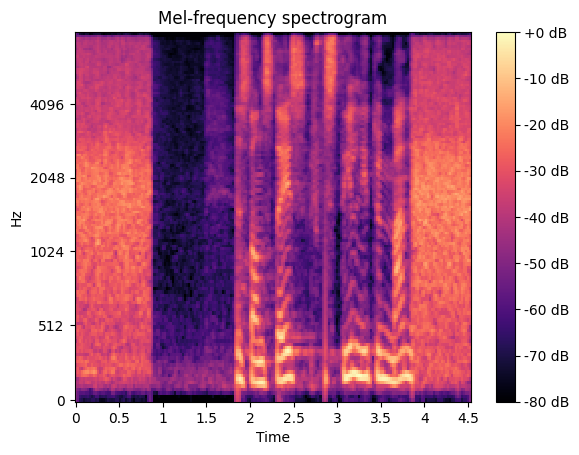

(1, 196)


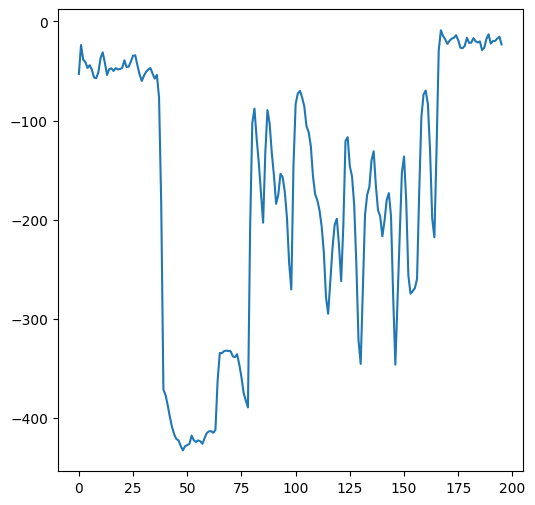

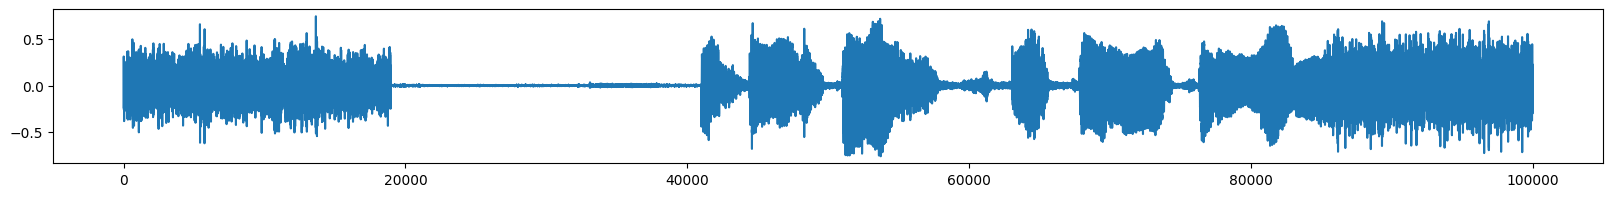

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.core.display import display

for i in classes:
  plt.figure(figsize=(20,2))
  fig, ax = plt.subplots()
  aoo = combini[i][400000:500000]
  stft = librosa.feature.chroma_stft(y=aoo)
  print(stft.shape)
  S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=aoo, sr=SAMPLE_RATE,fmax=8000), ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time',

                           y_axis='mel', sr=SAMPLE_RATE,

                           fmax=8000, ax=ax)

  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title='Mel-frequency spectrogram')
  plt.show()
  yolo = librosa.feature.mfcc(y=aoo,n_mfcc=1)
  print(yolo.shape)
  plt.figure(figsize=(6,6))
  plt.plot(yolo.T)
  plt.show()
  plt.figure(figsize=(20,2))
  plt.plot(aoo)
  display(Audio(data=aoo,rate=22050))

  break


In [ ]:
from IPython.display import Audio
from IPython.display import display
import librosa
import matplotlib.pyplot as plt
audio, sr = librosa.load("dataset/Jens_Stoltenberg/54.wav")
audio2, sr = librosa.load("dataset/Jens_Stoltenberg/3.wav")
noise, _  = librosa.load("dataset/_background_noise_/doing_the_dishes.wav")
noise2, _ = librosa.load("dataset/_background_noise_/10convert.com_Audience-Claps_daSG5fwdA7o.wav")
pink,_ = librosa.load("dataset/other/pink_noise.wav")
noise = noise[3*20250:4*22050]
noise2 = noise2[3*20250:4*22050]
display(Audio(audio2,rate=sr))

In [ ]:
from scipy.signal import butter,sosfilt,wiener

sos = butter(10,600,'high',analog=False,fs=22050,output='sos')
sos2 = butter(10,3000,'low',analog=False,fs=22050,output='sos')

In [ ]:
filtered = sosfilt(sos2,sosfilt(sos, audio))
f2 = sosfilt(sos2,sosfilt(sos, audio2))

In [ ]:
display(Audio(wiener(filtered,(441,)),rate=22050))
display(Audio(wiener(f2,(441,)),rate=22050))
plt.show()
plt.plot(wiener(audio2,(441,)))

In [ ]:
plt.plot((np.concatenate([np.sort(librosa.feature.rms(y=wiener(filtered,(441,)),hop_length=int(0.01*22050),frame_length=int(0.02*22050))[0]),
               np.sort(librosa.feature.rms(y=wiener(f2,(441,)),hop_length=int(0.01*22050),frame_length=int(0.02*22050))[0])])))

In [ ]:
import os
import numpy as np
discard = []
accept = []
ad = []
en = []
for i in non_silent_data["Jens_Stoltenberg"]:
    ad.append(librosa.load("dataset/Jens_Stoltenberg/"+i,sr=22050)[0])
    en.append(np.max(librosa.feature.rms(y=wiener(ad[-1],mysize=(1024,)),hop_length=220,frame_length=441)))

print(ad,en)

In [ ]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.scatter(en,en,alpha=0.1)
plt.show()

In [ ]:
threshold = 0.135
display(Audio(np.concatenate(np.array(ad)[np.array(en) > threshold]),rate=22050))

In [ ]:
import os
import numpy as np
import pandas as pd
discard = []
accept  = []
ad = []
fl = []
en = []
for i in non_silent_data["Jens_Stoltenberg"]:
    ad.append(librosa.load("dataset/Jens_Stoltenberg/"+i,sr=22050)[0])
    fl.append(i)
    en.append(np.max(librosa.feature.rms(y=wiener(ad[-1],mysize=(441,)),hop_length=220,frame_length=441)))

pd.DataFrame(np.array(fl)[np.array(en) > 0.12]).to_csv("Jens_Stoltenberg_c.csv")

In [ ]:
import os
import numpy as np
import pandas as pd
discard = []
accept  = []
ad = []
fl = []
en = []
for i in non_silent_data["Jens_Stoltenberg"]:
    ad.append(librosa.load("dataset/Jens_Stoltenberg/"+i,sr=22050)[0])
    fl.append(i)
    en.append(np.max(librosa.feature.rms(y=wiener(ad[-1],mysize=(441,)),hop_length=220,frame_length=441)))

pd.DataFrame(np.array(fl)[np.array(en) <= 0.12]).to_csv("Jens_Stoltenberg_c.csv")

# Final DataSet Generation

In [ ]:
import librosa
import numpy as np
import os
from IPython.display import Audio
from IPython.display import display
audio, sr =  librosa.load("dataset/Jens_Stoltenberg_n/54.wav")
audio2, sr = librosa.load("dataset/Jens_Stoltenberg_n/3.wav")
noise, _  =  librosa.load("dataset/_background_noise_/doing_the_dishes.wav")
noise2, _ =  librosa.load("dataset/_background_noise_/10convert.com_Audience-Claps_daSG5fwdA7o.wav")
pink,_ =  librosa.load("dataset/other/pink_noise.wav")
noise = noise[3*20250:4*22050]
noise2 = noise2[3*20250:4*22050]
audio = (audio - np.mean(audio))/np.std(audio)
audio2 = (audio2 - np.mean(audio2))/np.std(audio2)
pink = (pink - np.mean(pink))/np.std(pink)
noise = []
for i in os.listdir("dataset/_background_noise_/"):
    noise.append(librosa.load("dataset/_background_noise_/"+i,sr=22050)[0])
    noise[-1] = (noise[-1]- np.mean(noise[-1]))/np.std(noise[-1])
display(Audio(audio2 + noise[0][:22050] + pink[:22050],rate=sr))

In [ ]:
import os
classes = ["Benjamin_Netanyau","Jens_Stoltenberg","Julia_Gillard","Magaret_Tarcher","Nelson_Mandela"]

for i in classes:
    os.mkdir(os.path.join("new_noise_dataset",i))

In [ ]:
import pandas as pd
from scipy.io.wavfile import write
path  = "new_noise_dataset"
path  = "pure_dataset"
classes = ["Benjamin_Netanyau","Jens_Stoltenberg","Julia_Gillard","Magaret_Tarcher","Nelson_Mandela"]

noises = []
pink = librosa.load("dataset/other/pink_noise.wav")[0]
pink = (pink-np.mean(pink))/np.std(pink)

for i in os.listdir("dataset/_background_noise_/"):
    noise.append(librosa.load("dataset/_background_noise_/"+i,sr=22050)[0])
    noise[-1] = (noise[-1]- np.mean(noise[-1]))/np.std(noise[-1])

for i in os.listdir("dataset/other/"):
    noise.append(librosa.load("dataset/other/"+i,sr=22050)[0])
    noise[-1] = (noise[-1]- np.mean(noise[-1]))/np.std(noise[-1])


def random_noise_segment(lent,p=False):
    ns = noise[int(random(1)[0]*len(noise))]
    seg = int((len(ns)-lent)*random(1)[0]) + lent
    ns = ns[seg-lent:seg]
    return (ns - np.mean(ns))/np.std(ns)*(random(1)[0]*0.5 + 0.3)
for i in classes:
    dump = os.path.join(path,i)
    # dump2 = os.path.join(path2,i)
    fl = pd.read_csv(i + ".csv").to_numpy()[:,-1]
    for j in fl:
        audio = librosa.load(os.path.join("dataset",i+"_n",j),sr=22050)[0]
        audio = (audio -np.mean(audio))/np.std(audio)
        audio_n = audio + random_noise_segment(len(audio))
        write(os.path.join(dump,j),22050,audio_n)


In [ ]:
import librosa
import numpy as np
import os
import pandas as pd
from scipy.io.wavfile import write
path = "new_noise_dataset" #change paths to generate pure noise
for i in classes:
    dump = os.path.join(path,i)
    # dump2 = os.path.join(path2,i)
    fl = pd.read_csv(i + "_c.csv").to_numpy()[:,-1]
    for j in fl:
        audio = librosa.load(os.path.join("dataset",i+"_n",j),sr=22050)[0]
        audio = (audio -np.mean(audio))/np.std(audio)
        audio_n = audio
        write(os.path.join(dump,j),22050,audio_n)

# CMS ans Noise Mask testing

In [ ]:
import librosa
import matplotlib.pyplot as plt
audio, sr = librosa.load("dataset/Jens_Stoltenberg_n/54.wav")
audio2, sr = librosa.load("dataset/Jens_Stoltenberg_n/3.wav")
noise, _  = librosa.load("dataset/_background_noise_/doing_the_dishes.wav")
noise2, _ = librosa.load("dataset/_background_noise_/10convert.com_Audience-Claps_daSG5fwdA7o.wav")
pink,_ = librosa.load("dataset/other/pink_noise.wav")
noise = noise[3*20250:4*22050]
noise2 = noise2[3*20250:4*22050]
display(Audio(audio2,rate=sr))

In [ ]:
import numpy as np
fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=audio,n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='audio')
plt.show()
fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=noise,n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise')
plt.show()
fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=0.1*audio + 0.9* noise[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise+audio')
plt.show()

fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=0.05*pink[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='pink')
plt.show()
fig, ax = plt.subplots()

lul= librosa.feature.mfcc(y=0.1*audio + 0.1* noise[:22050] + 0.05*pink[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise+audio')
plt.show()

fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=0.1*audio + 0.9* noise2[:22050] + 0.05*pink[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise+audio')
plt.show()

fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=audio + pink[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise+audio')
plt.show()
fig, ax = plt.subplots()
lul= librosa.feature.mfcc(y=audio + 2*pink[:22050],n_mfcc=20,sr=22050,win_length=int(0.02*22050),hop_length=int(0.01*22050))
lul = lul - np.mean(lul,axis=1)[:,np.newaxis]
img = librosa.display.specshow(data=lul, x_axis='time', ax=ax)
fig.colorbar(img, ax=[ax])
ax.set(title='noise+audio')
plt.show()

# NaN

# Misc


In [ ]:
bg_noise=[]
path_noise1=PATH+'/'+'_background_noise_'
path_noise2=PATH+'/'+'other'

for i in os.listdir(path_noise1):
  bg_noise.append(librosa.load(path_noise1+'/'+i)[0])
for i in os.listdir(path_noise2):
  bg_noise.append(librosa.load(path_noise2+'/'+i)[0])
print(bg_noise)


[array([ 0.        ,  0.        ,  0.        , ..., -0.00411987,
       -0.00332642,  0.        ], dtype=float32), array([ 0.        ,  0.        ,  0.        , ...,  0.00234985,
       -0.00030518,  0.        ], dtype=float32), array([ 0.        ,  0.        ,  0.        , ..., -0.05502319,
       -0.01940918,  0.        ], dtype=float32), array([-9.05294344e-03, -5.33576682e-03,  1.08249895e-02, ...,
        3.74058145e-05, -5.46863303e-05, -1.88764825e-04], dtype=float32), array([ 0.        ,  0.        ,  0.        , ..., -0.0234375 ,
        0.00253296,  0.        ], dtype=float32), array([0.64282227, 0.4736328 , 0.23812866, ..., 0.24475098, 0.47232056,
       0.4489746 ], dtype=float32)]


In [ ]:
import random

def add_bgnoise(i,noise_level=1):
  new_audio=[]
  # if random.random()<0.4:
  noisee=random.choice(bg_noise)
  len_aud=i.shape[0]
  len_noise=noisee.shape[0]
  if len_aud>len_noise:
      noisee = np.pad(noisee, (0, len_aud - len_noise))
  else:
      noisee = noisee[:len_aud]

  final_noise = i + noise_level * noisee
  new_audio.append(final_noise)
  # else:
  #   new_audio.append(i)

  return np.array(new_audio)


In [ ]:
from IPython.display import Audio
from IPython.core.display import display
# print(len(combini['Jens_Stoltenberg']))
display(Audio(data=combini['Jens_Stoltenberg'][400000:500000],rate=SAMPLE_RATE))
nen=add_bgnoise(combini['Jens_Stoltenberg'][400000:500000])
# print(combini['Jens_Stoltenberg'][400000:500000].shape[0])
display(Audio(data=nen,rate=SAMPLE_RATE))


In [ ]:
datapath='/content/drive/MyDrive/ml_data'



In [ ]:
print(SAMPLE_RATE)

In [ ]:
# from matplotlib.cbook import delete_masked_points
import librosa
import librosa.display
# from python_speech_features import plp
import matplotlib.pyplot as plt
import numpy as np

def extract_features(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)  # Load at the original sample rate
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)
    delta = librosa.feature.delta(mfccs)
    delta_delta = librosa.feature.delta(delta,order=2)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_con = librosa.feature.spectral_contrast(y=y,sr=sr)
    features = np.vstack([mfccs, delta, delta_delta])
    return features.T

In [ ]:
import os
data_path = "/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet"
print(os.listdir(data_path))

['Benjamin_Netanyau', 'Julia_Gillard', 'Nelson_Mandela', 'Jens_Stoltenberg', 'Magaret_Tarcher']


In [ ]:
dic = {'Benjamin_Netanyau':0,'Jens_Stoltenberg':1,'Julia_Gillard':2,'Magaret_Tarcher':3,'Nelson_Mandela':4}

In [ ]:
from sklearn.model_selection import train_test_split
def split_fun(audio_name):
  audio = os.path.join(data_path,audio_name)
  audios = os.listdir(audio)
  y =[dic[audio_name] for i in range(len(audios))]
  X_train, X_test, y_train, y_test = train_test_split(
    audios, y,test_size=0.2, random_state=42
  )
  return X_train,X_test,y_train,y_test

In [ ]:
pip install scikit-learn

In [ ]:
# def Equal_Error_Rate(true_labels,test_labels):
#   fpr, tpr, thresholds = roc_curve(true_labels,test_labels, pos_label=1)
#   eer = (fpr[np.nanargmin(np.abs(fpr - (1 - tpr)))] + (1 - tpr)[np.nanargmin(np.abs(fpr - (1 - tpr)))]) / 2
#   return eer

In [ ]:
from sklearn.metrics import roc_curve
def compute_eer(label, pred):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    fpr, tpr, threshold = roc_curve(label, pred, pos_label=1)
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer

In [ ]:
main=[]
test=[]
Y_test=[]
for audio_name in os.listdir(data_path):
  audio = os.path.join(data_path,audio_name)
  print(audio)
  features=[]
  test_features=[]
  X_train,X_test,y_train,y_test = split_fun(audio_name)
  Y_test.append(y_test)
  for i in X_train:
    audio_path= os.path.join(audio,i)
    temp = extract_features(audio_path)
    for i in temp:
      features.append(i)
  main.append(features)
  for i in X_test:
    audio_path = os.path.join(audio,i)
    temp = extract_features(audio_path)
    test.append(temp)

/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet/Benjamin_Netanyau
/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet/Julia_Gillard
/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet/Nelson_Mandela
/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet/Jens_Stoltenberg
/content/drive/MyDrive/ADDEDNOISE/kaggle/working/FinalDataSet/Magaret_Tarcher


In [ ]:
from sklearn.mixture import GaussianMixture
def cal_gmm(X):
     gmm = GaussianMixture(n_components=10,random_state=42)
     gmm.fit(X)
     return gmm

In [ ]:
gmm =[]
for i in range(5):
    gmm.append(cal_gmm(main[i]))
    print(i)

0
1
2
3
4


In [ ]:
def max_likelihood(test,gmm):
  likelihood =[]
  likelihood_normalize=[]
  for model in gmm:
    likelihood.append(model.score(test))
  total = np.sum(likelihood)
  for model in gmm:
    likelihood_normalize.append(model.score(test)/(total-model.score(test)))
  return likelihood_normalize.index(max(likelihood_normalize))

In [ ]:
y_scores=[]
for i in Y_test:
  for j in i:
    y_scores.append(j)

In [ ]:
ans=[]
for i in test:
  ans.append(max_likelihood(i,gmm))

In [ ]:
print(len(ans))
print(len(y_scores))

In [ ]:
print(compute_eer(y_scores,ans))

In [ ]:
# df={
#     "speaker":[],
#     "features":[],
#     "filename":[]
# }
# for i in os.listdir(data_path):
#   print(i)
#   audio = os.path.join(data_path,i)
#   for j in os.listdir(audio):
#     audio_path = os.path.join(audio,j)
#     all_features=extract_features(audio_path)
#     df["speaker"].append(i)
#     df["filename"].append(audio_path)
#     df["features"].append(all_features)


In [ ]:
#UBM
fl=int(25*22050/1000)
hl=int(15*22050/1000)
features=[]
for i in os.listdir(PATH):
    # print("Doing " + i)
    if(i=='tf_Wav_reader.py'):
      continue
    for j in os.listdir(PATH+'/'+i):
        audio = librosa.load(PATH+ '/'+i + "/" + j ,sr=22050)[0]
        mfccs = librosa.feature.mfcc(y = audio, n_mfcc=13,hop_length=hl,win_length=fl)
        delta=librosa.feature.delta(mfccs,order=1)
        delta2=librosa.feature.delta(mfccs,order=2)
        all = np.concatenate([mfccs,delta,delta2])
        features.append(all.T)

In [ ]:

for i in os.listdir(data_path):
    # print("Doing " + i)
    for j in os.listdir(data_path+'/'+i):
        audio = librosa.load(data_path+ '/'+i + "/" + j ,sr=22050)[0]
        mfccs = librosa.feature.mfcc(y = audio, n_mfcc=13,hop_length=hl,win_length=fl)
        delta=librosa.feature.delta(mfccs,order=1)
        delta2=librosa.feature.delta(mfccs,order=2)
        all = np.concatenate([mfccs,delta,delta2])
        features.append(all.T)

In [ ]:
import pickle
featurefile = open('feature_df', 'ab')
pickle.dump(features,featurefile)
featurefile.close()

In [ ]:
featurearray=np.concatenate(features,axis=0)
# print(featurearray.shape)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=125,random_state=42)
gmm.fit(featurearray)

In [ ]:
ubmfile = open('ubm_df', 'ab')
pickle.dump(gmm,ubmfile)
ubmfile.close()

# Model Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.mixture import GaussianMixture,
import os


import os
import copy
import numpy as np
import librosa

from sklearn.mixture import GaussianMixture
pink,_ =  librosa.load("dataset/other/pink_noise.wav")
pink = (pink - np.mean(pink))/np.std(pink)

In [ ]:
def mask(audio):
    audio = (audio -np.mean(audio))/np.std(audio)
    if(len(audio) > len(pink)):
        return audio
    else:
        return 0.75*audio + 0.25*pink[:len(audio)]

In [ ]:
data = dict()
files = dict()
for i in os.listdir("pure_dataset"):
    data[i+'_n'] = []
    files[i+'_n'] = []
    filament = os.path.join("pure_dataset",i)
    for j in os.listdir(filament):
        audio,sr = librosa.load(os.path.join(filament,j))
        x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
        x = np.subtract(x.T,np.mean(x,axis=1)).T
        d1  = librosa.feature.delta(x,order=1,axis=1)
        d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
        d2  = librosa.feature.delta(x,order=2,axis=1)
        d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
        beta = np.concatenate([x,d1,d2])
        data[i+'_n'].append(beta)
        files[i+'_n'].append(j)
    print(i,"done")

for i in os.listdir("new_noise_dataset"):
    data[i] = []
    files[i] = []
    filament = os.path.join("new_noise_dataset",i)
    for j in os.listdir(filament):
        audio,sr = librosa.load(os.path.join(filament,j))
        x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
        x = np.subtract(x.T,np.mean(x,axis=1)).T
        d1  = librosa.feature.delta(x,order=1,axis=1)
        d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
        d2  = librosa.feature.delta(x,order=2,axis=1)
        d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
        beta = np.concatenate([x,d1,d2])
        data[i].append(beta)
        files[i].append(j)
    print(i,"done")

data["clap"] = []
files["clap"] = []
for i in os.listdir("clap_dataset"):
    filament = os.path.join("clap_dataset",i)
    for j in os.listdir(filament):
        audio,sr = librosa.load(os.path.join(filament,j))
        x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
        x = np.subtract(x.T,np.mean(x,axis=1)).T
        d1  = librosa.feature.delta(x,order=1,axis=1)
        d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
        d2  = librosa.feature.delta(x,order=2,axis=1)
        d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
        beta = np.concatenate([x,d1,d2])
        data["clap"].append(beta)
        files["clap"].append(j)
    print(i,"done")

data["_background_noise_"] = []
files["_background_noise_"] = []
for i in os.listdir("dataset/_background_noise_"):
    audio,sr = librosa.load(os.path.join("dataset/_background_noise_",i))
    x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
    x = np.subtract(x.T,np.mean(x,axis=1)).T
    d1  = librosa.feature.delta(x,order=1,axis=1)
    d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
    d2  = librosa.feature.delta(x,order=2,axis=1)
    d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
    beta = np.concatenate([x,d1,d2])

    data["_background_noise_"].append(beta)
    files["_background_noise_"].append(j)
    print(i,"done")

data["other"] = []
files["other"] = []
for i in os.listdir("dataset/other"):
    audio,sr = librosa.load(os.path.join("dataset/other",i))
    x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
    x = np.subtract(x.T,np.mean(x,axis=1)).T
    d1  = librosa.feature.delta(x,order=1,axis=1)
    d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
    d2  = librosa.feature.delta(x,order=2,axis=1)
    d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
    beta = np.concatenate([x,d1,d2])
    data["other"].append(beta)
    files["other"].append(j)
    print(i,"done")


In [ ]:
import pickle
dbfile = open("data_files","ab")
pickle.dump((data,files),dbfile)
dbfile.close()

In [ ]:
import pickle
dbfile = open("data_files","rb")
data,files = pickle.load(dbfile)
dbfile.close()

In [ ]:
from sklearn.model_selection import train_test_split
train_data = dict()
test_data = dict()
train_files = dict()
test_files = dict()
#train_test spliting
for i in data.keys():
    train_data[i], test_data[i], train_files[i],test_files[i] = train_test_split(data[i],files[i],test_size=0.2,train_size=0.8,random_state=42)

In [ ]:

ubmw_data = []
for i in train_data.keys():
    ubmw_data.append(np.concatenate(train_data[i],axis=1))

In [ ]:

plc = np.concatenate(ubmw_data,axis=1)
del ubmw_data
ubmw_data = plc

In [ ]:
ubm_w  = GaussianMixture(n_components=64,warm_start=True,verbose=True,verbose_interval=1)

In [ ]:
ubm_w.fit(ubmw_data.T)
dbfile = open("UBM_final","ab")
pickle.dump(ubm_w,dbfile)
dbfile.close()

In [ ]:
d = open("UBM_final","rb")
ubm_w = pickle.load(d)
d.close()

In [ ]:
def map_adapt(ubm, X, max_iter=100, r=16):

    gmm = copy.deepcopy(ubm)
    for lod in range(50):
        prev_mean = gmm.means_
        print(lod,end=" , ")
        n = np.sum(gmm.predict_proba(X), axis=0).reshape(-1, 1) +1e-7
        X_tilde = (1 / n) * gmm.predict_proba(X).T.dot(X)
        alpha = (n / (n + r)).reshape(-1, 1)
        gmm.means_ = alpha * X_tilde + (1 - alpha) * gmm.means_
        print(np.linalg.norm(gmm.means_-prev_mean))
        if(np.linalg.norm(gmm.means_-prev_mean) <1e-3):
            break
    return gmm

for gmm-ubm method

In [ ]:
classes = ["Benjamin_Netanyau","Jens_Stoltenberg","Julia_Gillard","Magaret_Tarcher","Nelson_Mandela"]
models = dict()
for i in classes:
    gmm = GaussianMixture(n_components=24,verbose=1,verbose_interval=1)
    models[i] = gmm.fit(np.concatenate([np.concatenate(train_data[i],axis=1),np.concatenate(train_data[i+"_n"],axis=1)],axis=1).T)

In [ ]:
import pickle
d = open("gmm_ubm","ab")
pickle.dump(models,d)
d.close()


In [ ]:
import pickle
d = open("gmm_ubm","rb")
models = pickle.load(d)
d.close()

for ubm with map transform

In [ ]:
from concurrent.futures import ThreadPoolExecutor
def func(i):
    return (i,map_adapt(ubm_w,np.concatenate([np.concatenate(train_data[i],axis=1),np.concatenate(train_data[i+"_n"],axis=1)],axis=1).T))
e = ThreadPoolExecutor(5)
futures = [e.submit(func, i) for i in classes[:]]
results = [f.result() for f in futures]

In [ ]:
import pickle
d = open("map_ubm","ab")
pickle.dump(models,d)
d.close()

In [ ]:
import pickle
d = open("map_ubm","rb")
models = pickle.load(d)
d.close()

In [ ]:
import numpy as np
import sklearn.metrics
def compute_eer(label, pred, positive_label=1):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    pred = (pred - np.min(pred))/(np.max(pred)- np.min(pred))
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred, pos_label=positive_label)
    # plt.plot(np.array([tpr,fpr]).T)
    # plt.show()
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer,eer_threshold

train eval

In [ ]:
scores = {}
labels = {}
for i in models.keys():
    scores[i] = []
    labels[i] = []
    for j in train_data.keys():
        if(j == "clap"):
            continue
        if(i == j or i+'_n' == j):
            print(i,j)
            for k in train_data[j]:
                scores[i].append(models[i].score(k.T) - ubm_w.score(k.T))
                labels[i].append(1)
                # break
        else:
            for k in train_data[j]:
                scores[i].append(models[i].score(k.T) - ubm_w.score(k.T))
                labels[i].append(0)
    #             break
    #     break
    # break
    print("done for",i)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
for i in scores.keys():
    # tr = np.array(scores[i]) > 0
    # fr = np.invert(tr)
    eer,th = compute_eer(label=np.array(labels[i]),pred=scores[i])
    pred = np.array((np.array(scores[i]) > th),dtype=int)
    act = np.array(labels[i])
    tn, fp, fn, tp = confusion_matrix(act,pred).ravel()

    print(i +" --------------------\n","EER:  ",eer,"\nthres: ",th,"\nrecall:",tp/(tp+fn),)

test eval

In [ ]:
scores = {}
labels = {}
for i in models.keys():
    scores[i] = []
    labels[i] = []
    for j in test_data.keys():
        if(j == "clap"):
            continue
        if(i == j or i+'_n' == j):
            print(i,j)
            for k in test_data[j]:
                scores[i].append(models[i].score(k.T) - ubm_w.score(k.T))
                labels[i].append(1)
                # break
        else:
            for k in test_data[j]:
                scores[i].append(models[i].score(k.T) - ubm_w.score(k.T))
                labels[i].append(0)
    #             break
    #     break
    # break
    print("done for",i)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
for i in scores.keys():
    # tr = np.array(scores[i]) > 0
    # fr = np.invert(tr)
    eer,th = compute_eer(label=np.array(labels[i]),pred=scores[i])
    pred = np.array((np.array(scores[i]) > th),dtype=int)
    act = np.array(labels[i])
    tn, fp, fn, tp = confusion_matrix(act,pred).ravel()

    print(i +" --------------------\n","EER:  ",eer,"\nthres: ",th,"\nrecall:",tp/(tp+fn),)

#Test Script

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.mixture import GaussianMixture
import os


import os
import copy
import numpy as np
import librosa

from sklearn.mixture import GaussianMixture
pink,_ =  librosa.load("dataset/other/pink_noise.wav")
pink = (pink - np.mean(pink))/np.std(pink)

In [ ]:
def mask(audio):
    audio = (audio -np.mean(audio))/np.std(audio)
    if(len(audio) > len(pink)):
        return audio
    else:
        return 0.75*audio + 0.25*pink[:len(audio)]

In [ ]:
FOLDER_PATH = "ENTER_FOLDER_PATH_HERE"
CSV_PATH = "ENTER_CSV_PATH_HERE"

In [ ]:
dgm = "PATH_OF_GMM_MODELS"
ubm = "PATH_OF_UBM"
thres = "PATH_TO_THRESH"

dgm = open(dgm,"rb")
ubm = open(ubm,"rb")
thres = open(thres,"rb")

In [ ]:
import pickle
gmm_model = pickle.load(dgm)
ubm_model = pickle.load(ubm)
thres = pickle.load(thres)

In [ ]:
import pandas as pd
df = pd.read_csv(CSV_PATH)

In [ ]:
import os
for r in df.iloc:
    audio =  librosa.load(os.path.join(FOLDER_PATH,r["file"]),sr=22050)[0]
    x = librosa.feature.mfcc(y=mask(audio),n_mfcc=13,hop_length=int(0.01*22050),win_length=int(0.02*22050))
    x = np.subtract(x.T,np.mean(x,axis=1)).T
    d1  = librosa.feature.delta(x,order=1,axis=1)
    d1 = np.subtract(x.T,np.mean(d1,axis=1)).T
    d2  = librosa.feature.delta(x,order=2,axis=1)
    d2 = np.subtract(x.T,np.mean(d2,axis=1)).T
    beta = np.concatenate([x,d1,d2])
    likelihood = gmm_model[r["speaker"]].score(beta.T) - ubm_model.score(beta.T)
    if(likelihood > thres[r["speaker"]]):
      print(True, "for", r["file"])
    else:
      print(False, "for", r["file"])

format for csv

file, speaker

Benjamin_Netanyau/1.wav,Benjamin_Netanyau

Jens_Stoltenberg/2.wav,Jens_Stoltenberg